#Linear Regression Homework with Yelp Votes
Anujit Basu

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

C:\Users\Anujit_2\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


**Task 1:** Read ```yelp.csv``` into a DataFrame

In [2]:
yelp = pd.read_csv('../DAT-DC-10/data/yelp.csv')

**Task 1 Bonus:** Ignore the ```yelp.csv``` file, and construct this DataFrame yourself from ```yelp.json```. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [3]:
import json
with open('../DAT-DC-10/data/yelp.json') as data_file:
    data = [json.loads(line) for line in data_file]

In [4]:
yelp2 = pd.DataFrame(data)
yelp2.iloc[0]

business_id                               9yKzy9PApeiPPOUJEtnvkg
date                                                  2011-01-26
review_id                                 fWKvX83p0-ka4JS3dc6E5A
stars                                                          5
text           My wife took me here on my birthday for breakf...
type                                                      review
user_id                                   rLtl8ZkDX5vH5nAx9C3q5Q
votes                    {u'funny': 0, u'useful': 5, u'cool': 2}
Name: 0, dtype: object

In [5]:
yelp2['cool'] = yelp2.apply(lambda row: row.votes['cool'], axis = 1)
yelp2['useful'] = yelp2.apply(lambda row: row.votes['useful'], axis = 1)
yelp2['funny'] = yelp2.apply(lambda row: row.votes['funny'], axis = 1)
yelp2.iloc[0]

business_id                               9yKzy9PApeiPPOUJEtnvkg
date                                                  2011-01-26
review_id                                 fWKvX83p0-ka4JS3dc6E5A
stars                                                          5
text           My wife took me here on my birthday for breakf...
type                                                      review
user_id                                   rLtl8ZkDX5vH5nAx9C3q5Q
votes                    {u'funny': 0, u'useful': 5, u'cool': 2}
cool                                                           2
useful                                                         5
funny                                                          0
Name: 0, dtype: object

**Task 2:** Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

C:\Users\Anujit_2\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


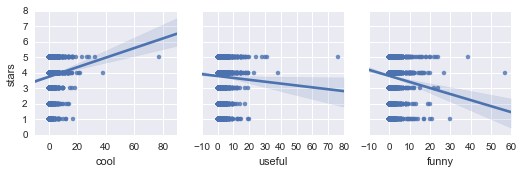

In [6]:
sns.pairplot(yelp, x_vars=['cool', 'useful', 'funny'], y_vars='stars', kind='reg')

***Observations:*** The Intercept is rather high but very similar for all three predictors. While ```cool``` has a +ve correlation with ```stars```, ```useful``` has a -ve correlation. ```Funny``` has an even more -ve correlation. You hope your business reviews are not ```funny```!!! ... Beyond that, the three predictors individually do not seem to have much of an ability to predict the number of ```stars```. Let us see if the correlation matrix bears this out.

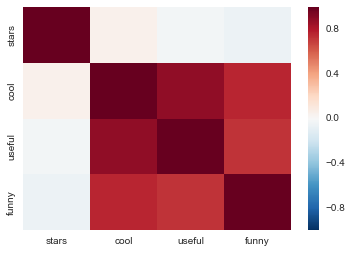

In [7]:
sns.heatmap(yelp.corr())

**Task 3:** Define cool/useful/funny as the features, and stars as the response.

In [8]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

**Task 4:** Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [9]:
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

zip(feature_cols, linreg.coef_)

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


[('cool', 0.27435946858859295),
 ('useful', -0.14745239099400873),
 ('funny', -0.13567449053705782)]

***Observations:*** The intercept is close to 4, which means that if the comments have none of these three kinds of votes, then the average rating is 4 stars. ```Cool``` votes increase the star rating, while  ```useful``` and ```funny``` tend to reduce the star rating. This is also intutive. However, it is a surprise that in combination, ```useful``` has a more -ve impact than ```funny```. This was not the case when they were evaluated individually.

**Task 5:** Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print "RMSE = " + str(rmse)

RMSE = 1.17336862742


***Observations:*** The high RMSE makes sense as there are is lot of variance of ```stars```. A simple linear regression model should not be able to do a very good job.

**Task 6:** Try removing some of the features and see if the RMSE improves.

In [11]:
# looks like we will have to do training/evaluation multiple times. 
# Lets define a function for this that takes in the features and gives back the rmse
def build_evaluate(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return rmse

In [12]:
#repeat Task 5 above and make sure rmse is same
build_evaluate(['cool', 'useful', 'funny'])

1.1733686274194486

In [13]:
# lets try dropping one feature at a time
print str(build_evaluate(['cool', 'useful']))
print str(build_evaluate(['cool', 'funny']))
print str(build_evaluate(['useful', 'funny']))

1.18537944234
1.1851949299
1.20070113589


In [14]:
# lets try dropping two features at a time
print str(build_evaluate(['cool']))
print str(build_evaluate(['useful']))
print str(build_evaluate(['funny']))

1.20049049928
1.20143488625
1.20043591364


***Observation:*** Dropping any of the three features does not improve prediction rmse

**Task 7 - Bonus:** Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [15]:
# new feature - total votes
yelp['total_v'] = yelp.cool + yelp.useful  + yelp.funny
build_evaluate(['cool', 'useful', 'funny', 'total_v'])

1.1734094537254356

In [16]:
# new feature - length of review
yelp['review_len'] = yelp.text.apply(len)
build_evaluate(['cool', 'useful', 'funny', 'review_len'])

1.1668570972776697

**Task 8 - Bonus:** Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [17]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# createthe null array and fill it with the test set mean
y_null = np.empty(y_test.count())
y_null.fill(y_test.mean())

null_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_null))

print null_rmse

1.20197810296


**Task 9 - Bonus:** Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [18]:
def knn_build_evaluate(n):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [19]:
knn_build_evaluate(5)

0.33639999999999998

In [20]:
knn_build_evaluate(10)

0.32000000000000001

In [21]:
knn_build_evaluate(15)

0.32919999999999999

In [22]:
knn_build_evaluate(20)

0.34079999999999999

In [23]:
knn_build_evaluate(11)

0.23039999999999999

In [24]:
knn_build_evaluate(12)

0.24840000000000001

In [25]:
knn_build_evaluate(13)

0.26200000000000001

In [26]:
knn_build_evaluate(14)

0.3332

n_neighbors = 11 looks like a good local minima

**Task 10 - Bonus:** Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [27]:
# rounding the prediction would be a good guess
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred_rounded = y_pred.round()
metrics.accuracy_score(y_test, y_pred_rounded)

0.35759999999999997

Much better with rounding. However, it is still not matching the best knn (11 neighbors) found above.